In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import requests
import os
import lxml
import seaborn as sns

In [2]:
from Source.ScrapePlayersWages import Scrape_Wage

In [18]:
leagues = ["La_Liga", "Premier_League", 
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]
LeaguesDict = {}
LeagueDictFull = {}
for i in leagues:
    LeaguesDict[i] = Scrape_Wage(i)
    LeagueDictFull[i] = LeaguesDict[i][['Player Name', 'Weekly Wage',
                                       'Yearly Salary', 'Age', 
                                       'Position','Nationality']]
    LeaguesDict[i] = LeaguesDict[i].sort_values('Weekly Wage',
                                                ascending = False)
    LeaguesDict[i] = LeaguesDict[i].groupby("Team").nth([i for i in range(11)]
                                                        ).reset_index()[['Player Name',
                                                                         'Weekly Wage',
                                                                         'Age', 'Team']]
    LeaguesDict[i] = LeaguesDict[i].groupby("Team")['Weekly Wage'].agg(['mean']).reset_index()
    
    LeaguesDict[i] = LeaguesDict[i].sort_values('mean', ascending = False).reset_index(drop=True)
    LeaguesDict[i] = LeaguesDict[i].set_index("Team")
    LeaguesDict[i] = LeaguesDict[i].rename(columns = {"mean":"Average Wage of top 11 Earners of each Team"})

In [11]:
# for j in leagues:
#     print("")
#     print(j)
#     print(LeaguesDict[j].head(5))
#     print("")

In [4]:
LeaguesDict.keys()

dict_keys(['La_Liga', 'Premier_League', 'Seria_A', 'Bundesliga', 'Ligue_1', 'Liga_Nos'])

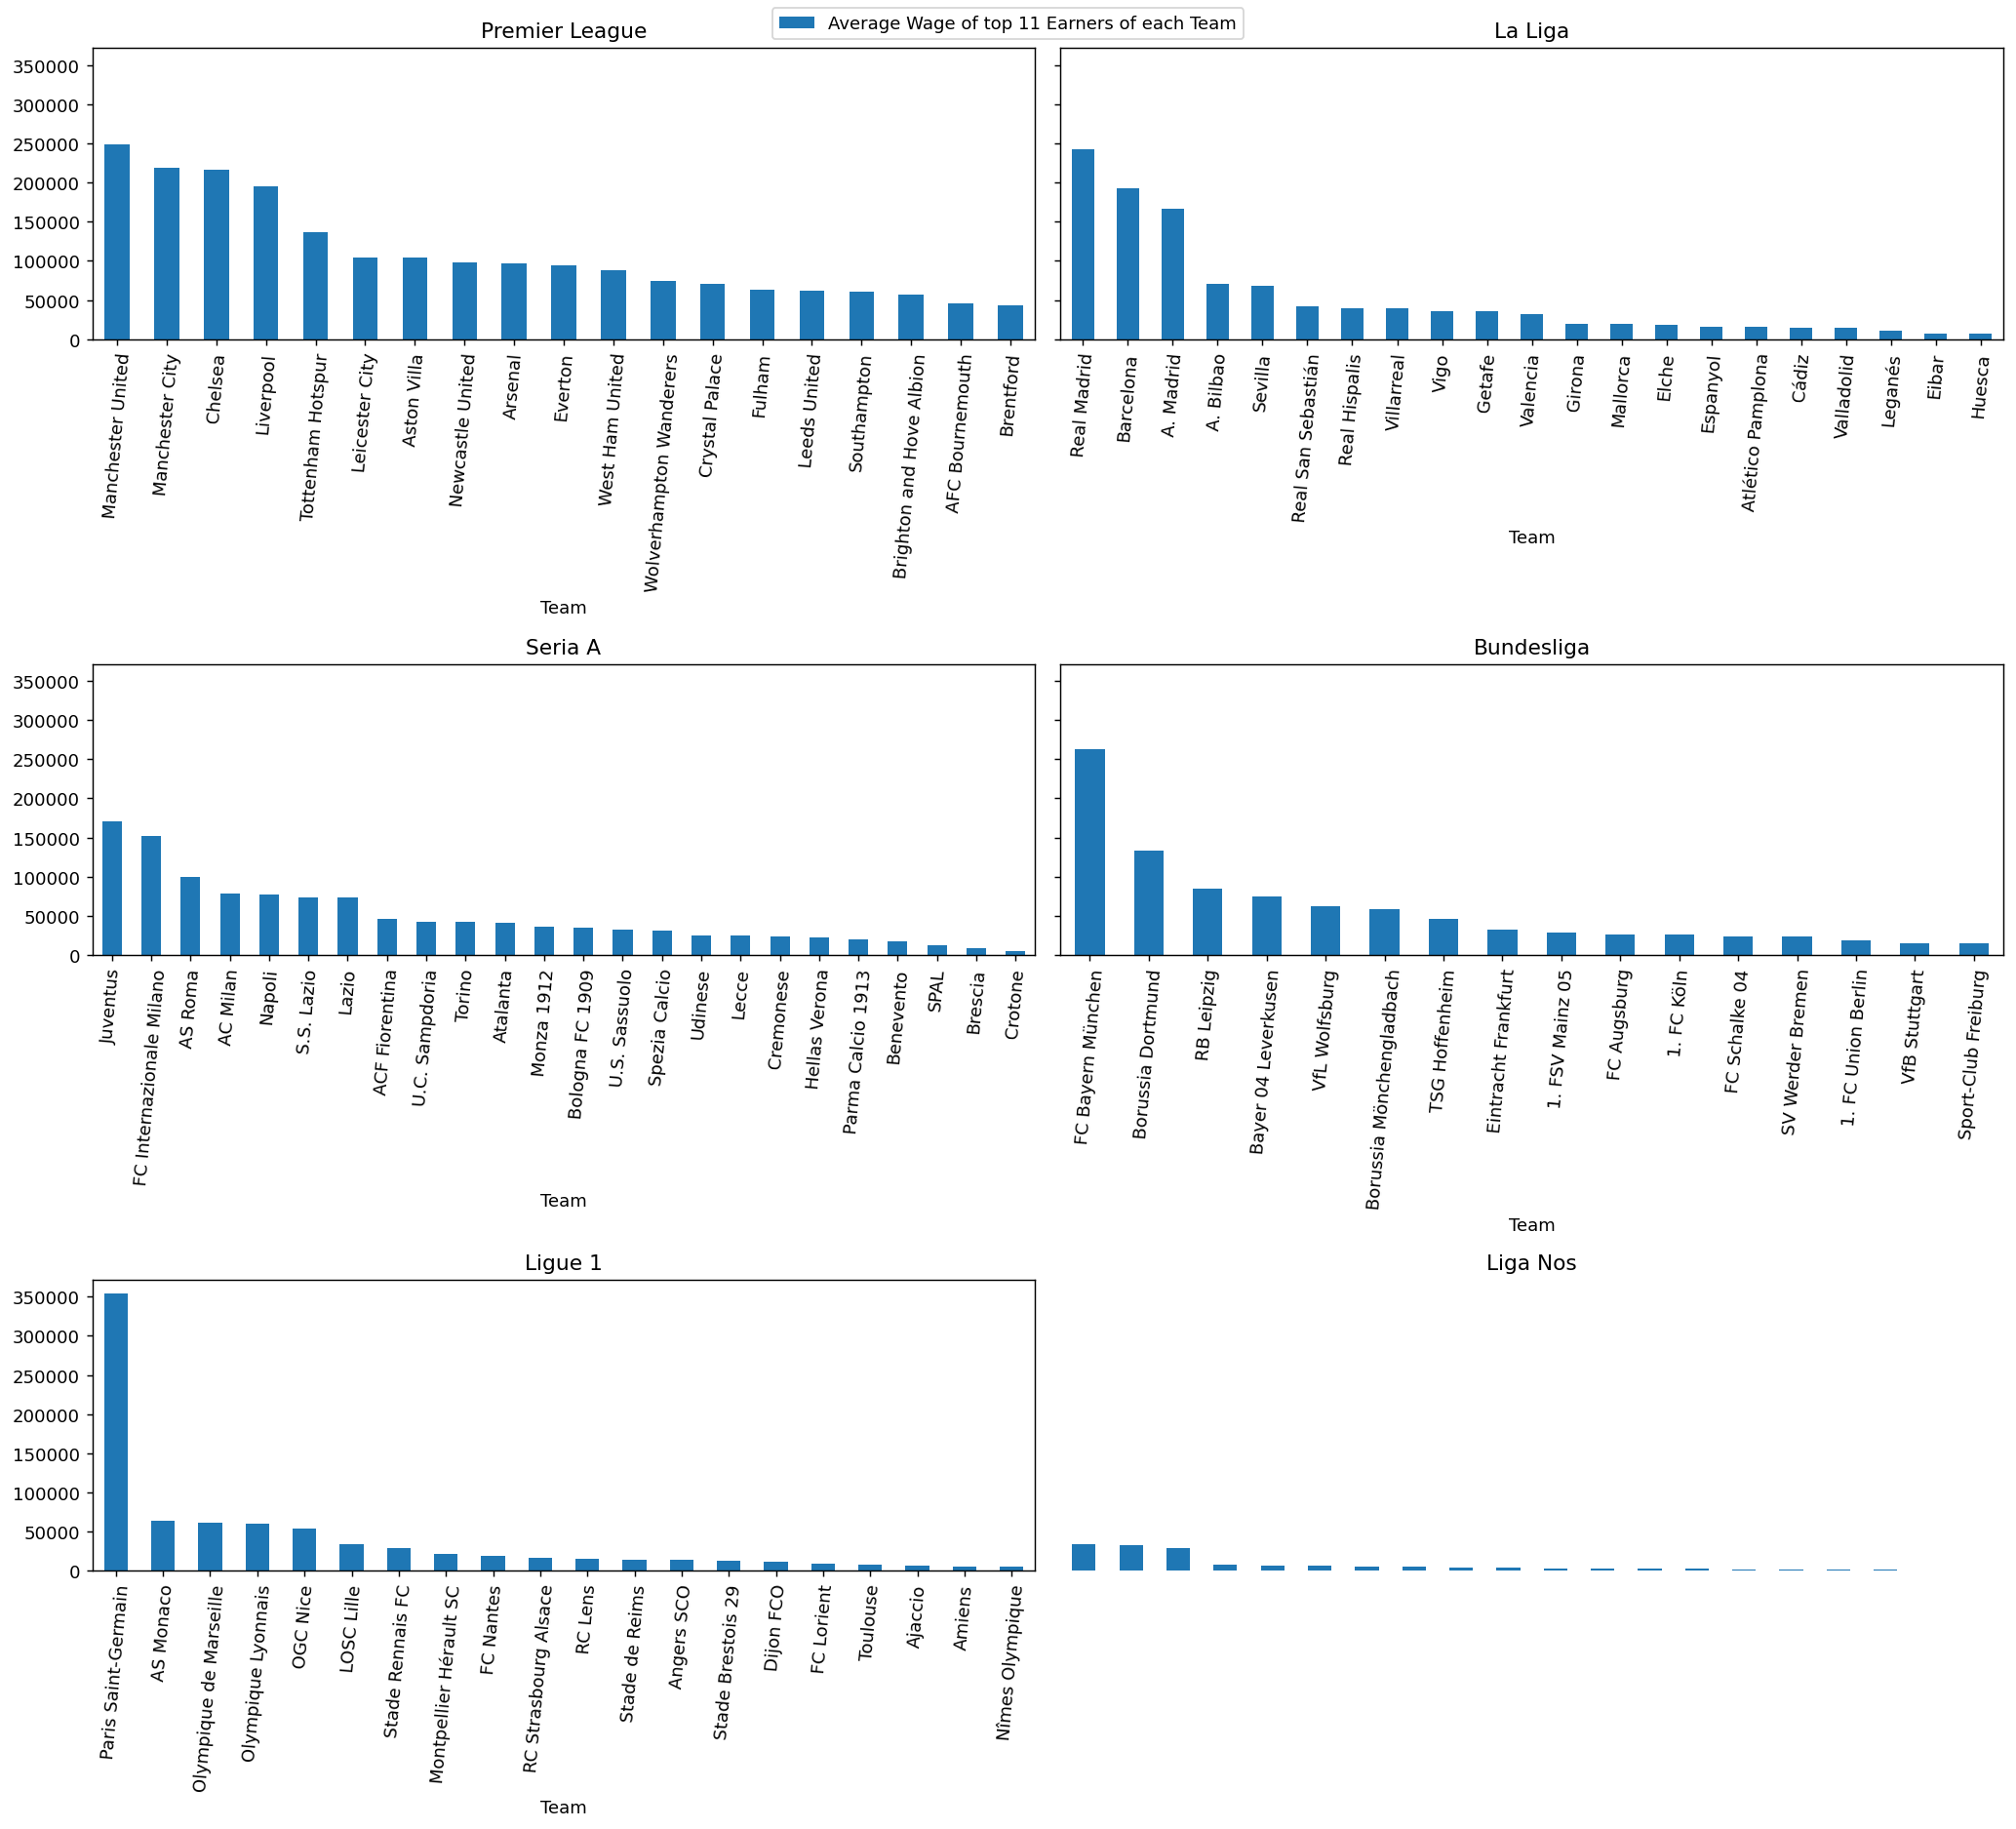

In [6]:
plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True)


axes[0, 0].set_title('Premier League')
LeaguesDict["Premier_League"].plot(ax=axes[0, 0], kind = "bar", legend=0,  rot=85)

axes[0, 1].set_title('La Liga')
LeaguesDict["La_Liga"].plot(ax=axes[0, 1], kind = "bar", legend=0,  rot=85)

axes[1, 0].set_title('Seria A')
LeaguesDict["Seria_A"].plot(ax=axes[1, 0], kind = "bar", legend=0,  rot=85)

axes[1, 1].set_title('Bundesliga')
LeaguesDict["Bundesliga"].plot(ax=axes[1, 1], kind = "bar", legend=0,  rot=85)

axes[2, 0].set_title('Ligue 1')
LeaguesDict["Ligue_1"].plot(ax=axes[2, 0], kind = "bar", legend=0,  rot=85)

axes[2, 1].set_title('Liga Nos')
LeaguesDict["Liga_Nos"].plot(ax=axes[2, 1], kind = "bar", legend=0,  rot=85)

handles, labels = axes[2,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.axis('off')

plt.show()

### PSG wages are insane

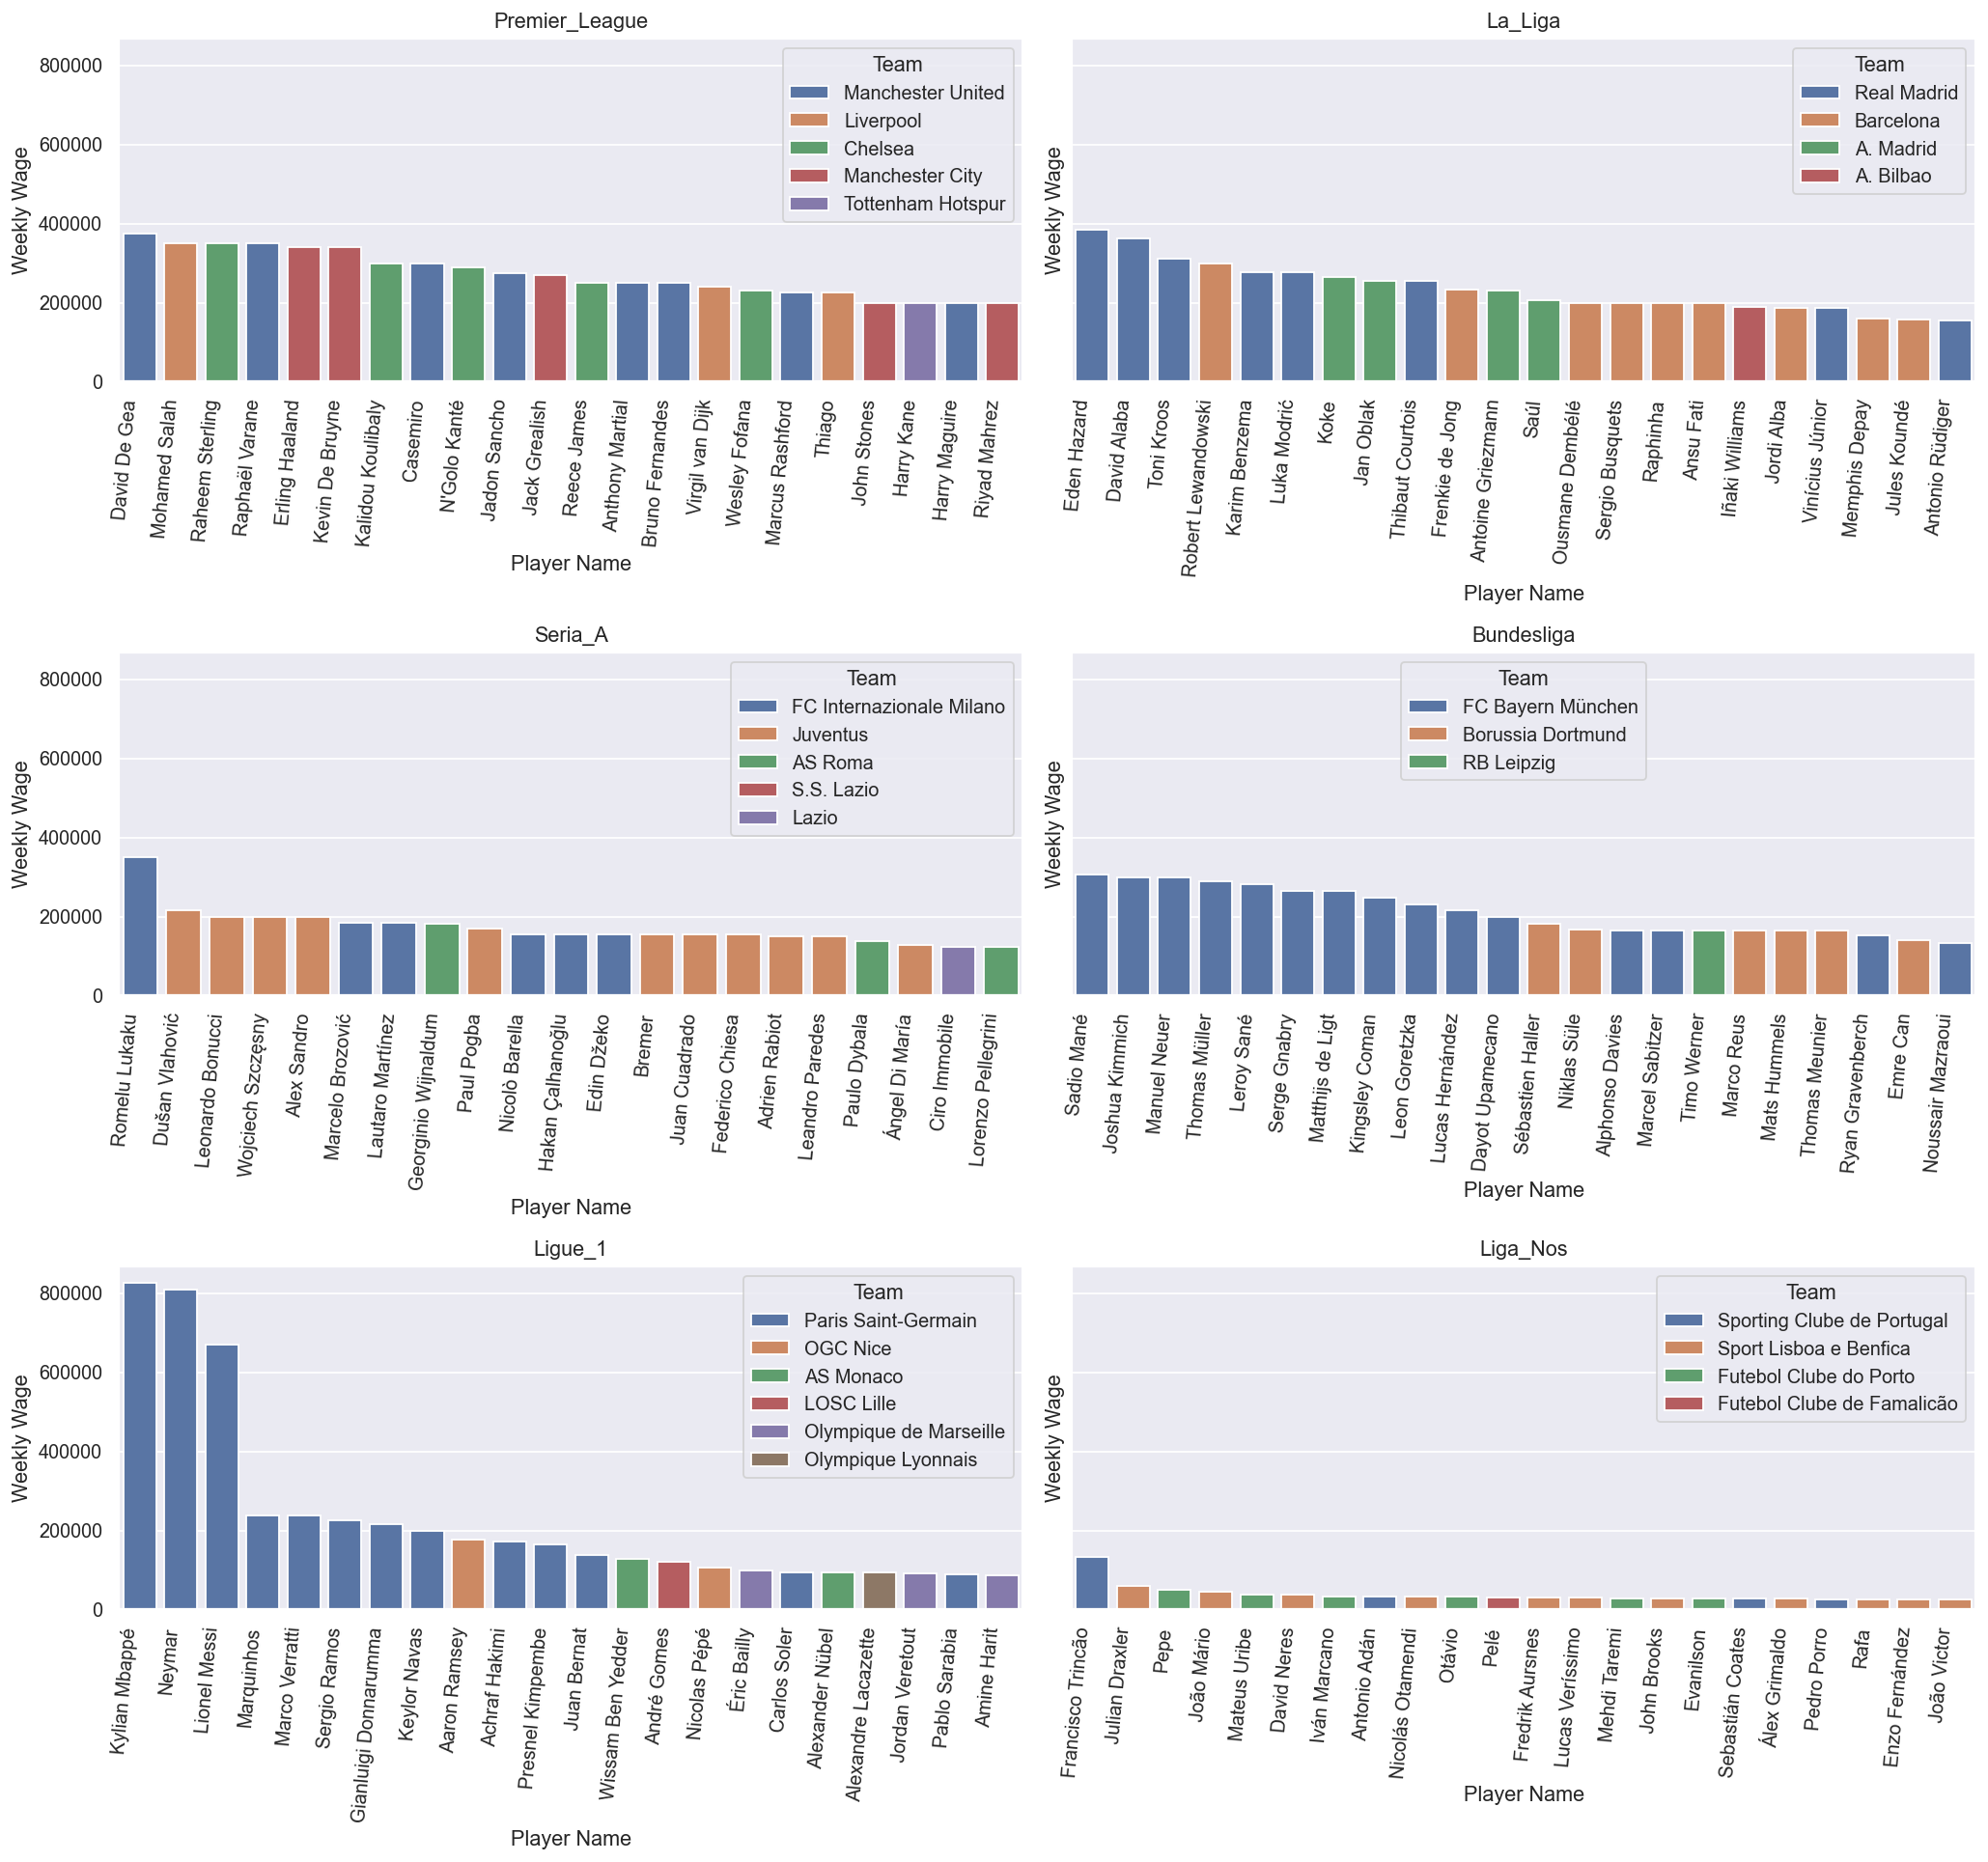

In [68]:
leagues = ["Premier_League", "La_Liga",  
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]

plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True, squeeze=False)

for d, i, j in zip(leagues, [0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]):
    df = LeagueDictFull[d].sort_values('Weekly Wage', ascending = 0).iloc[0:22]
    # sns.set(rc={'figure.figsize':(10.7,6.27)})
    
    axes[i, j].set_title(d)
    sns.barplot(x='Player Name', y='Weekly Wage', 
                          data=df, hue='Team', dodge=False,
                         ax = axes[i,j])
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), 
                              rotation=85, 
                              horizontalalignment='right')
    

plt.tight_layout()

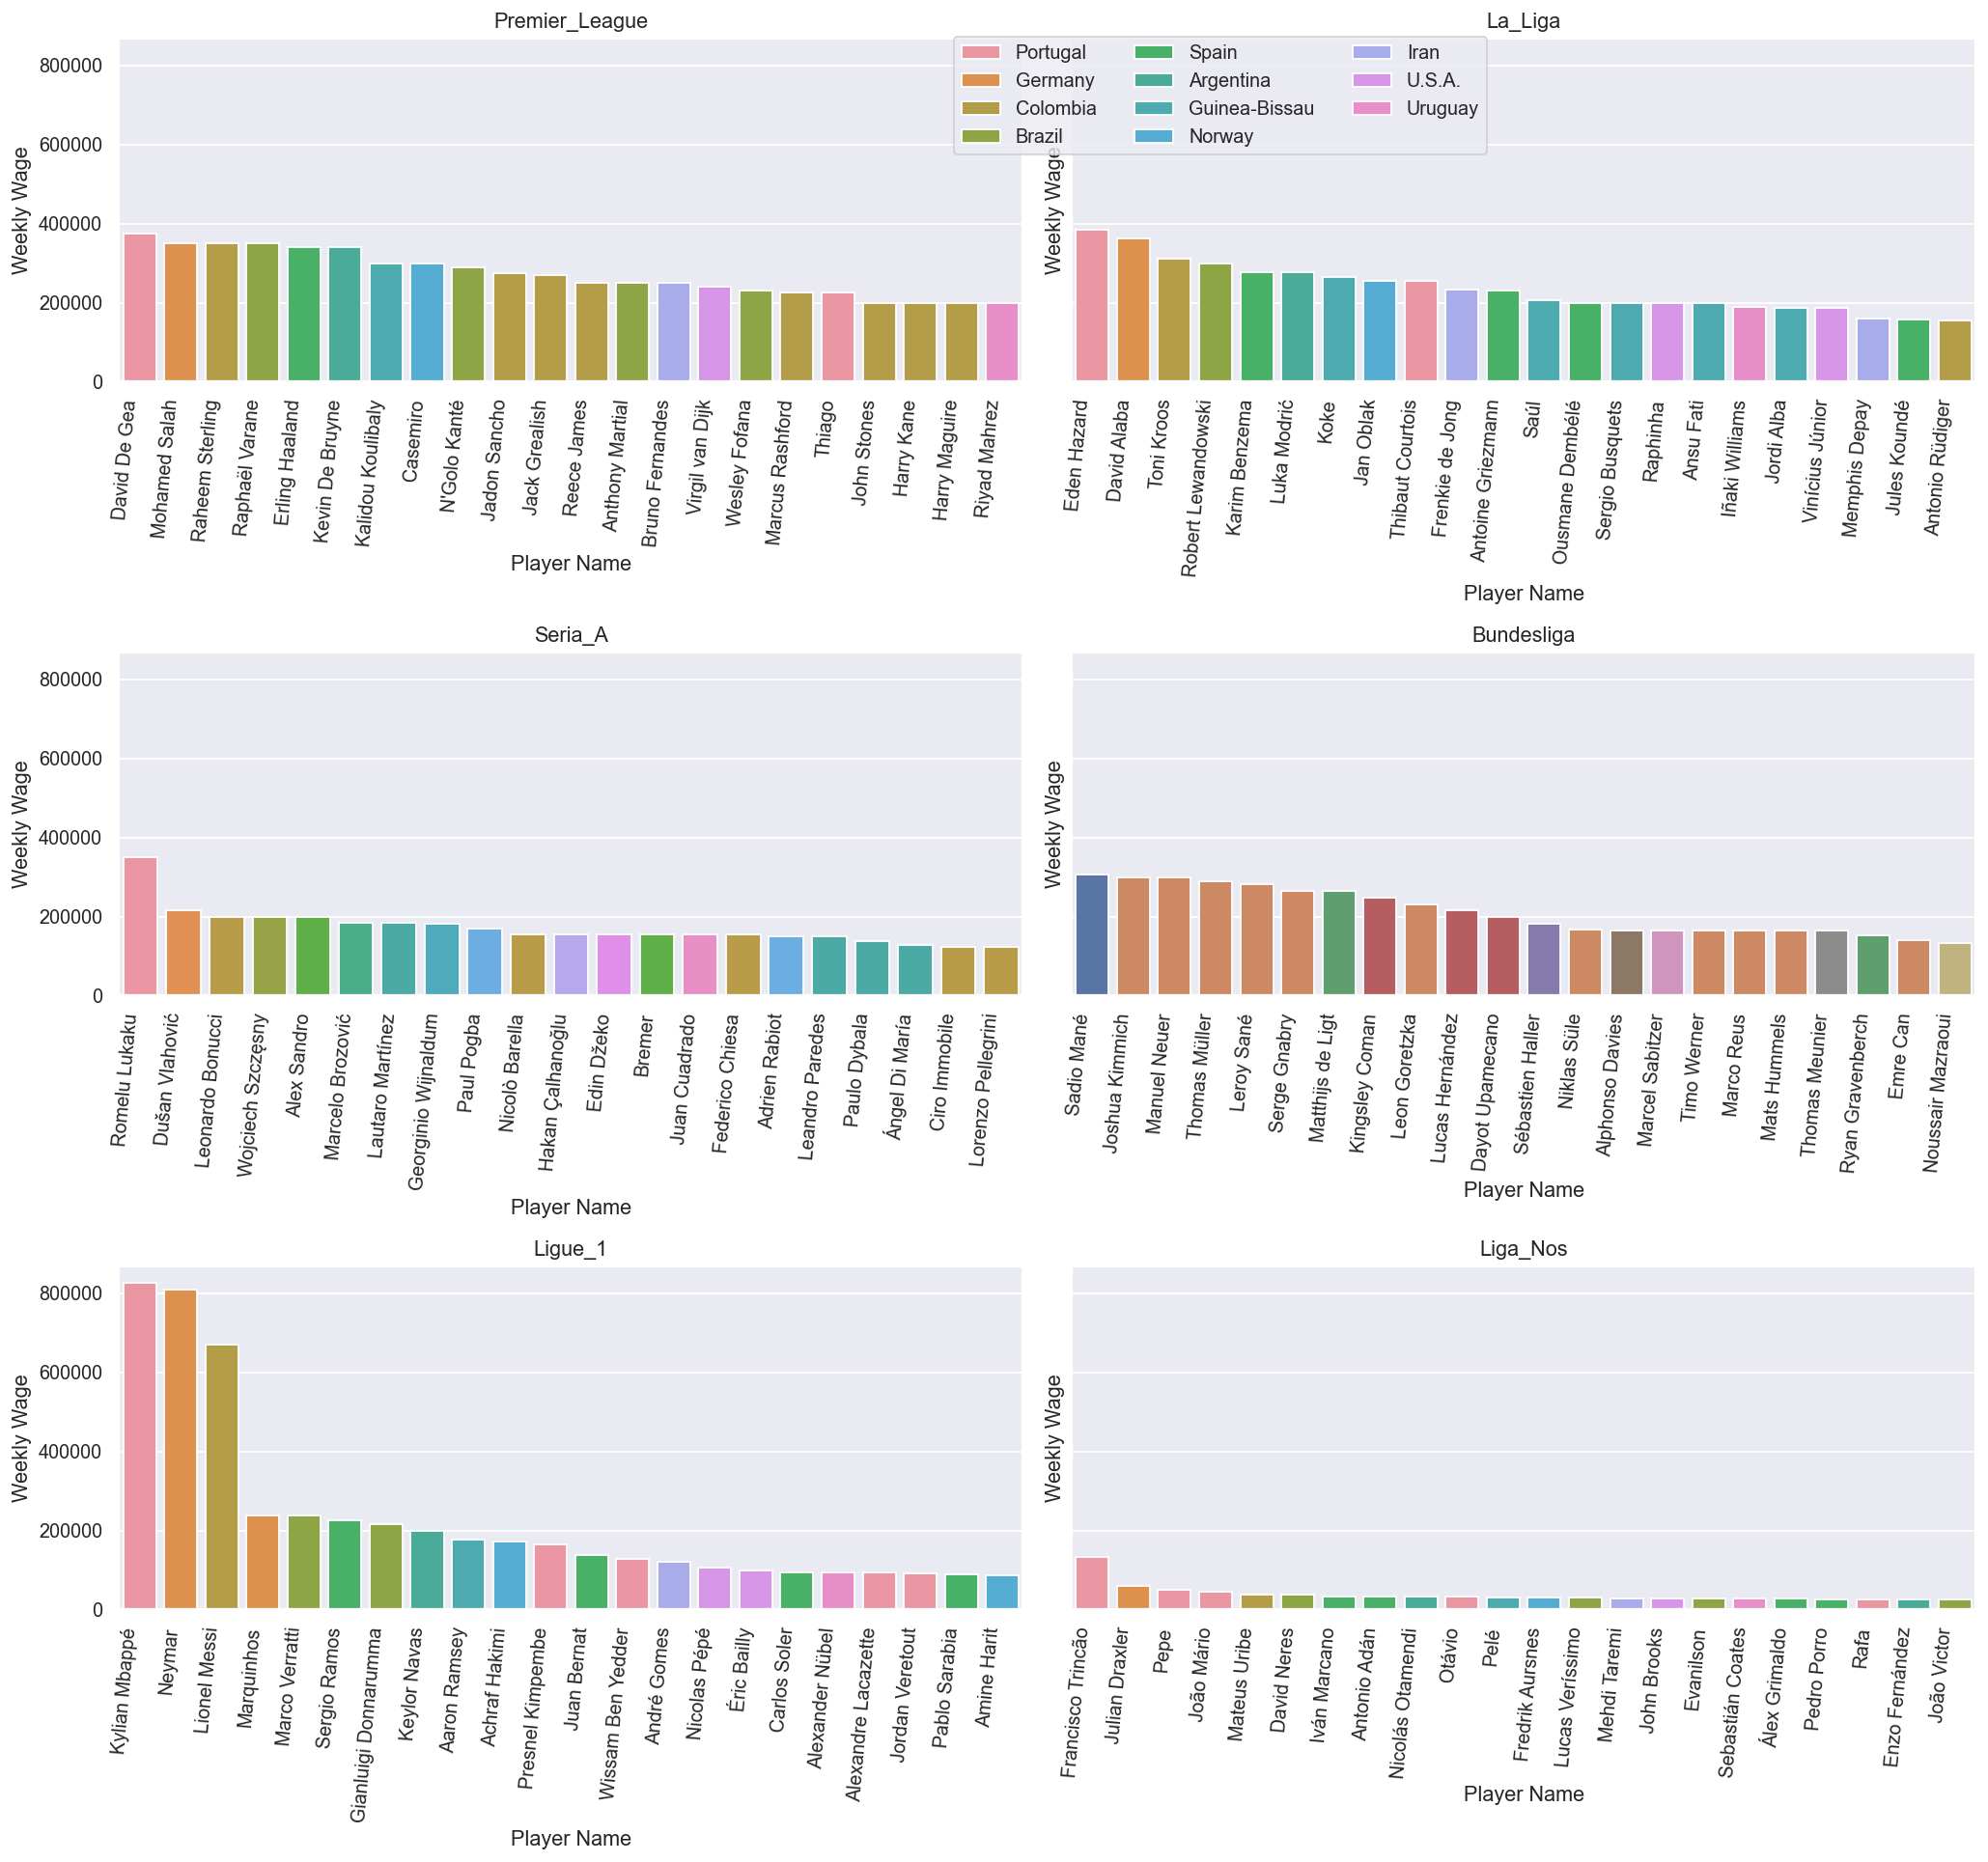

In [84]:

leagues = ["Premier_League", "La_Liga",  
           "Seria_A", "Bundesliga", 
           "Ligue_1", "Liga_Nos"]

plt.rcParams.update({'figure.figsize':(16,15), 'figure.dpi':130})
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey=True, squeeze=False)

for d, i, j in zip(leagues, [0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]):
    df = LeagueDictFull[d].sort_values('Weekly Wage', ascending = 0).iloc[0:22]
    # sns.set(rc={'figure.figsize':(10.7,6.27)})
    
    axes[i, j].set_title(d)
    sns.barplot(x='Player Name', y='Weekly Wage', 
                          data=df, hue='Nationality', dodge=False,
                         ax = axes[i,j])
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), 
                              rotation=85, 
                             horizontalalignment='right')
    axes[i, j].get_legend().remove()
    
handles, labels = axes[i, j].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(.75, 0.98))

plt.tight_layout()


In [83]:
[axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2, 1]]

[<AxesSubplot:title={'center':'Premier_League'}, xlabel='Player Name', ylabel='Weekly Wage'>,
 <AxesSubplot:title={'center':'La_Liga'}, xlabel='Player Name', ylabel='Weekly Wage'>,
 <AxesSubplot:title={'center':'Seria_A'}, xlabel='Player Name', ylabel='Weekly Wage'>,
 <AxesSubplot:title={'center':'Bundesliga'}, xlabel='Player Name', ylabel='Weekly Wage'>,
 <AxesSubplot:title={'center':'Ligue_1'}, xlabel='Player Name', ylabel='Weekly Wage'>,
 <AxesSubplot:title={'center':'Liga_Nos'}, xlabel='Player Name', ylabel='Weekly Wage'>]

In [29]:
import pickle
with open('FootballWages/Output/file.pickle', 'wb') as f:
    pickle.dump(LeagueDictFull, f)

In [30]:
os.getcwd()

'G:\\My Drive\\Freelancing\\Web Scraping'

In [31]:
df_dict = pd.read_pickle('FootballWages/Output/file.pickle') 

In [34]:
df_dict["La_Liga"].columns


Index(['Player Name', 'Weekly Wage', 'Yearly Salary', 'Age', 'Position',
       'Nationality'],
      dtype='object')

In [35]:
df_dict = pd.read_pickle('https://github.com/Macosso/FootballWages/blob/main/Output/file.pickle')

UnpicklingError: invalid load key, '\x0a'.